# Heatmap 
- using padj < 0.01 as the cutoff for the current analysis

In [51]:
# Let the middle rows included.
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

In [52]:
library(ggplot2)
library(dplyr)
library(NMF)
library(RColorBrewer)
library(pheatmap)
library(RColorBrewer)
library(ggpubr)
library(glue)

In [53]:
feat_df <- read.table("../../../output/PS_species_v2_hMinImp_TICnorm_groupFil0.3_HILICpos_1wayANOVA/one_wayANOVA_PS_species_v2_hMinImp_TICnorm_groupFil0.3_HILICpos_fullreport.csv"
        ,row.names = 1, header = TRUE, sep = ',')

In [54]:
head(feat_df)

,formula,neutral_mass,short_name,ion_relation,interium_id,id_number,mz,rtime,rtime_left_base,rtime_right_base,parent_masstrack_id,peak_area,cSelectivity,goodness_fitting,snr,detection_counts,Naive_percNA,Naive_mean,R5neg_percNA,R5neg_mean,R5pos_percNA,R5pos_mean,gMean_Naive,gMean_R5neg,gMean_R5pos,log2FC_R5negvsNaive,log2FC_R5posvsNaive,log2FC_R5posvsR5neg,f_score,pval,padj,Tpadj_R5neg.Naive,Tpadj_R5pos.Naive,Tpadj_R5pos.R5neg,TFDR_R5neg.Naive,TFDR_R5pos.Naive,TFDR_R5pos.R5neg,Naive_1,Naive_2,Naive_3,R5neg_1,R5neg_2,R5neg_3,R5pos_1,R5pos_2,R5pos_3,nist,q3June2014_1,q3June2014_2
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F10003,,NA,,,,F10003,123.9407,35.94,33.57,38.04,2340,30823583,1.00,0.91,415,9,0,2469180.0,1.0000000,NA,0,3641169.0,21.11810,19.90317,21.38667,-1.2149388,0.26856303,1.4835018,18.6326486,0.002667072,0.01908728,0.008004955,0.5828549,0.002968608,0.06008466,1,0.02259984,20.90484,21.54631,20.90317,19.90317,19.90317,19.90317,21.84730,21.08456,21.22815,23.21189,NA,NA
F10020,,NA,,,,F10020,296.9425,53.54,50.65,55.65,8137,45604739,0.80,0.90,3729,19,0,639860.0,0.6666667,247029.0,0,1915439.3,19.02161,17.54998,20.49799,-1.4716270,1.47638417,2.9480112,13.8958783,0.005597852,0.02827235,0.086349193,0.0854230,0.004521396,0.26236142,1,0.02749508,20.08540,18.76799,18.21144,18.22707,17.21144,17.21144,20.59919,20.80727,20.08752,21.41660,21.52271,21.49107
F1004,,NA,,,,F1004,163.1327,26.48,24.90,28.58,4014,35305308,1.00,0.97,62,22,0,1600517.0,0.0000000,1334282.3,0,2652481.3,20.51508,20.65452,20.82629,0.1394412,0.31120601,0.1717648,0.3782372,0.700314849,0.75685353,0.921033067,0.6780556,0.883448556,1.00000000,1,0.96695497,20.73620,20.52498,20.28406,20.61270,20.45533,20.89554,21.62140,20.37309,20.48437,24.36783,20.01896,19.83592
F10040,,NA,,,,F10040,123.9714,38.83,35.94,41.19,2343,55007782,1.00,0.93,410,22,0,2360620.3,0.0000000,929869.0,0,2922137.3,21.05513,20.13539,21.14502,-0.9197416,0.08988825,1.0096299,13.3264017,0.006204293,0.03021458,0.012739912,0.9106937,0.008230900,0.07775836,1,0.03833248,21.51926,20.94958,20.69657,19.97926,20.09958,20.32734,21.10047,21.19097,21.14364,22.26640,21.63916,21.38997
F10041,,NA,,,,F10041,123.9714,49.34,46.71,52.49,2343,41299127,1.00,0.91,1894,20,0,341284.7,0.6666667,503391.5,0,383692.3,18.27640,17.60573,18.21617,-0.6706691,-0.06023160,0.6104375,0.5635618,0.596637979,0.67250247,0.626273031,0.9959176,0.675150454,0.82835445,1,0.81447188,18.45191,18.55376,17.82353,19.25407,16.78156,16.78156,18.16202,18.29117,18.19532,19.57024,17.89008,17.78156
F10043,,NA,,,,F10043,334.8363,38.83,36.20,41.72,9084,824080479,0.92,0.93,87,22,0,57745695.7,0.0000000,35060034.7,0,70728723.0,25.68666,25.36528,25.74497,-0.3213800,0.05830815,0.3796881,3.3162487,0.107148503,0.19367808,0.187205217,0.9292218,0.117281865,0.40432241,1,0.22507462,25.92974,25.65477,25.47547,25.31839,25.55658,25.22086,25.56156,25.91448,25.75886,25.80546,24.88368,24.83231


In [55]:
feat_df = feat_df %>% filter(!is.na(neutral_mass))

In [56]:
feat_df

,formula,neutral_mass,short_name,ion_relation,interium_id,id_number,mz,rtime,rtime_left_base,rtime_right_base,parent_masstrack_id,peak_area,cSelectivity,goodness_fitting,snr,detection_counts,Naive_percNA,Naive_mean,R5neg_percNA,R5neg_mean,R5pos_percNA,R5pos_mean,gMean_Naive,gMean_R5neg,gMean_R5pos,log2FC_R5negvsNaive,log2FC_R5posvsNaive,log2FC_R5posvsR5neg,f_score,pval,padj,Tpadj_R5neg.Naive,Tpadj_R5pos.Naive,Tpadj_R5pos.R5neg,TFDR_R5neg.Naive,TFDR_R5pos.Naive,TFDR_R5pos.R5neg,Naive_1,Naive_2,Naive_3,R5neg_1,R5neg_2,R5neg_3,R5pos_1,R5pos_2,R5pos_3,nist,q3June2014_1,q3June2014_2
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F13199,C26H46NO9P,547.2910,LPS 20:3,"M0,M+H+",kp802_547.2934,F13199,548.3007,24.64,22.28,27.79,12591,124579197,1.00,0.87,7880,13,0.0000000,18878581.3,0.0000000,14459066.7,0.0000000,24287771,24.06018,24.08319,24.05723,0.02300941,-0.002942386,-0.0259518,1.440125e-03,9.985613e-01,0.9985612560,9.989599e-01,0.9999829795,9.986771e-01,1.000000000,1.00000000,1.000000000,24.08338,24.45670,23.64044,24.37743,23.83728,24.03485,22.91200,24.82122,24.43848,16.85336,NA,NA
F15644,C23H48NO9P,513.3067,LPS O-17:0;O,"M0,M+H+",kp1000_513.3087,F15644,514.3160,25.69,23.59,28.84,12125,175004713,1.00,0.79,4391,12,0.0000000,21108380.7,0.0000000,12356394.5,0.0000000,40490043,24.00988,23.86554,24.83457,-0.14434039,0.824699048,0.9690394,2.060946e+00,2.082901e-01,0.3061920101,9.579254e-01,0.3154617376,2.238971e-01,1.000000000,1.00000000,0.358002782,23.00810,24.25440,24.76713,23.68646,23.98221,23.92793,25.25177,25.09492,24.15703,NA,NA,NA
F16887,C43H74NO10P,795.5050,PS 37:5,,18418,F16887,814.5237,38.30,37.25,40.93,15182,21192207,0.91,0.79,173,9,0.0000000,2497862.0,0.6666667,1307590.0,0.0000000,3815311,21.14422,19.91319,21.52445,-1.23103161,0.380228725,1.6112603,1.465287e+01,4.908152e-03,0.0262051825,1.757572e-02,0.4841441230,4.943634e-03,0.094201799,1.00000000,0.028779011,21.02884,21.17845,21.22538,19.57986,20.57986,19.57986,21.25309,21.85145,21.46881,21.44177,NA,NA
F17414,C46H78NO10P,835.5363,PS 40:6,"M0,M+H+",kp1134_835.5335,F17414,836.5404,31.21,28.32,34.10,15349,103806372,0.89,0.76,955,12,0.0000000,6749219.7,0.0000000,15090883.7,0.0000000,5675062,22.58424,24.15682,22.01102,1.57258813,-0.573215061,-2.1458032,1.582094e+01,4.049858e-03,0.0237254870,1.709484e-02,0.3760948414,3.889496e-03,0.092881945,1.00000000,0.026050856,22.89911,22.48117,22.37244,24.13285,24.24680,24.09082,21.21226,22.78435,22.03645,NA,NA,NA
F17672,C48H76NO10P,857.5207,PS 42:9,"M0,M+H+",kp1157_857.517,F17672,858.5225,36.20,33.31,39.35,15462,8755217,1.00,0.96,565,7,0.6666667,144497.0,0.0000000,944536.3,1.0000000,NA,16.48831,20.15106,16.15498,3.66274795,-0.333333333,-3.9960813,1.141813e+02,1.677989e-05,0.0007045013,3.983891e-05,0.5290062657,2.384129e-05,0.001809731,1.00000000,0.001017384,17.15498,16.15498,16.15498,19.88481,20.25283,20.31554,16.15498,16.15498,16.15498,NA,NA,NA
F17876,C48H76NO10P,857.5207,PS 42:9,,18848,F17876,880.5136,38.57,36.99,40.93,15553,11312904,0.80,0.90,1700,7,0.0000000,1973445.0,0.3333333,595968.0,0.3333333,3313658,20.81326,18.41678,19.96034,-2.39648157,-0.852922697,1.5435589,1.471372e+00,3.020238e-01,0.4044988275,2.827626e-01,0.8241412119,5.537985e-01,0.520967591,1.00000000,0.707177731,21.05213,20.96355,20.42411,18.04788,20.15459,17.04788,17.04788,21.59848,21.23466,NA,NA,NA
F17923,C40H78NO10P,763.5363,PS 34:0,"M0,M+H+",kp1173_763.535,F17923,764.5423,24.90,23.85,28.06,14745,36740590,1.00,0.76,3775,12,0.0000000,4626460.7,0.0000000,4637921.5,0.0000000,5904858,22.03665,22.43966,22.08513,0.40300302,0.048476400,-0.3545266,8.179980e-01,4.851284e-01,0.5801910202,5.102633e-01,0.9891335636,5.864705e-01,0.746142219,1.00000000,0.735011227,21.99890,22.01227,22.09880,22.53209,22.62157,22.16532,21.49114,22.83666,21.9275

In [106]:
rownames(feat_df)

[1] "F13199|M0,M+H+|LPS 20:3"     "F15644|M0,M+H+|LPS O-17:0;O"
 [3] "F16887||PS 37:5"             "F17414|M0,M+H+|PS 40:6"     
 [5] "F17672|M0,M+H+|PS 42:9"      "F17876||PS 42:9"            
 [7] "F17923|M0,M+H+|PS 34:0"      "F18169||PS 34:5"            
 [9] "F18473||PS 36:1"             "F18893|M0,Na/H|PS 36:1"

In [107]:
if (!(grepl("\\|",rownames(feat_df)[1]))) {
    rownames(feat_df) = paste0(rownames(feat_df),"|",feat_df$ion_relation,"|",feat_df$short_name)
} 


In [108]:
meta_df <- read.table("../../../input/sequence_file/clean_deduplicated_meta_df.csv",
                     header = TRUE, sep = ',', row.names = 1)

In [109]:
head(meta_df,5)

,class,biological_samples,cell_number
,<chr>,<chr>,<int>
Naive_1,Naive,Yes,300
Naive_2,Naive,Yes,300
Naive_3,Naive,Yes,300
R5neg_1,R5neg,Yes,655
R5neg_2,R5neg,Yes,687


In [110]:
sample_names = colnames(feat_df)[grepl('Naive\\_[0-9]+|R5pos\\_[0-9]+|R5neg\\_[0-9]+',colnames(feat_df))]
sample_names
length(sample_names)
padj_columns = colnames(feat_df[grepl('padj',colnames(feat_df))]);padj_columns

[1] "Naive_1" "Naive_2" "Naive_3" "R5neg_1" "R5neg_2" "R5neg_3" "R5pos_1"
[8] "R5pos_2" "R5pos_3"

[1] 9

[1] "padj"              "Tpadj_R5neg.Naive" "Tpadj_R5pos.Naive"
[4] "Tpadj_R5pos.R5neg"

In [111]:
colnames(meta_df)

[1] "class"              "biological_samples" "cell_number"

# Define filtering level - FDR control

In [112]:
filtered_level = 0.05
feat_df.filt = feat_df[feat_df$padj < filtered_level & !is.na(feat_df$padj),]

In [113]:
dim(feat_df.filt)

[1]  5 49

## subset datatable with only data values

In [114]:
feat_df.filt.data = feat_df.filt[sample_names]

# Plot heatmap wrapper function

In [115]:
feat_df.filt.data.scale <- t(scale(t(feat_df.filt.data)))

In [116]:
range(feat_df.filt.data.scale, na.rm = TRUE)

[1] -1.624787  1.396989

#### columns and rows annotation

In [117]:
colnames(meta_df)

[1] "class"              "biological_samples" "cell_number"

In [118]:
unique(meta_df$class)

[1] "Naive" "R5neg" "R5pos"

## Since the metadata is not exclusively the data 

In [119]:
# since the row names are the sample.ID used in data colnames
meta_df = meta_df[sample_names,]

In [120]:
assign_values4annot <- function(df = feat_df.filt.data.scale, 
                                meta_column_name = 'class') {  
    Var_vec = colnames(df)
    for (factor_level in unique(meta_df[,meta_column_name])) {
        Var_vec[Var_vec %in% 
                 rownames(meta_df[meta_df[,meta_column_name] == factor_level,])] = factor_level
        }
    return(Var_vec)
}

In [121]:
Var1_vec = assign_values4annot(feat_df.filt.data.scale, 'class')

In [122]:
annotation_col = data.frame(class = Var1_vec)
rownames(annotation_col) = colnames(feat_df.filt.data.scale)                            

# annotation_col = data.frame(illness_duration = Var1_vec, 
#                             gender = Var2_vec, 
#                             age = Var3_vec)
# rownames(annotation_col) = colnames(feat_df.filt.data.scale)

In [123]:
# since age is continuous measure (integers), needs to convert to integers
# annotation_col$age = as.integer(annotation_col$age)

In [124]:
annotation_col$class

[1] "Naive" "Naive" "Naive" "R5neg" "R5neg" "R5neg" "R5pos" "R5pos" "R5pos"

#### Annotation of rows (here don't have these)

In [125]:
# panel_vec = sapply(strsplit(rownames(feat_df.filt.data.scale),"_",1),function(x)x[1])
# annotation_row = data.frame(panel = panel_vec) 
# rownames(annotation_row) = rownames(feat_df.filt.data.scale)

## Assign colors

In [126]:
class = c("#888888","#0000ff","#ff0000")
names(class) = c("Naive","R5pos","R5neg")

# gender = c("#FF7A33", "#33D7FF")
# names(gender) = c("Female","Male")

In [127]:
ann_colors = list(class = class)
# ann_colors = list(illness_duration = illness_duration, 
#                   gender = gender,
#                   age = age
#                  )

In [128]:
range(feat_df.filt.data.scale) #check the range of z_transformed

[1] -1.624787  1.396989

In [129]:
feat_df.filt.data.scale[feat_df.filt.data.scale < -2] = -2
feat_df.filt.data.scale[feat_df.filt.data.scale > 2] = 2

In [130]:
range(feat_df.filt.data.scale) #check the range of z_transformed

[1] -1.624787  1.396989

In [131]:
breaksList = seq(range(feat_df.filt.data.scale)[1],
                 range(feat_df.filt.data.scale)[2],
                 length.out = 100) 

quantile_breaks <- function(xs, n = 100) {
  breaks <- quantile(xs, probs = seq(0, 1, length.out = n))
  breaks[!duplicated(breaks)]
}

mat_breaks <- quantile_breaks(feat_df.filt.data.scale, n = 101)
cell_colors <- colorRampPalette(rev(brewer.pal(n = 9, name = "RdBu")))(length(mat_breaks))

In [132]:
# options(repr.plot.width=30, repr.plot.height=30, res=300)
# pheatmap(feat_df.filt.data.NA.scale.rplNAmin, cluster_rows = TRUE, show_rownames = TRUE, cluster_cols = TRUE, 
#          annotation_col = annotation_col, annotation_row = annotation_row, clustering_method = "complete", 
#          cellwidth = 5,cellheight = 10, annotation_colors = ann_colors,
#          color = cell_colors)

In [133]:
out_dir = "../../../output/PS_species_v2_hMinImp_TICnorm_groupFil0.3_HILICpos_1wayANOVA/heatmap/"
dir.create(out_dir)

exp_label = 'hMinImp_TICnorm_HILICpos_1wayANOVA'
out_pdf_file = file.path(out_dir, glue("{exp_label}_padj{filtered_level}_heatmap.pdf"))

Warning message in dir.create(out_dir):
“'../../../output/PS_species_v2_hMinImp_TICnorm_groupFil0.3_HILICpos_1wayANOVA/heatmap' already exists”


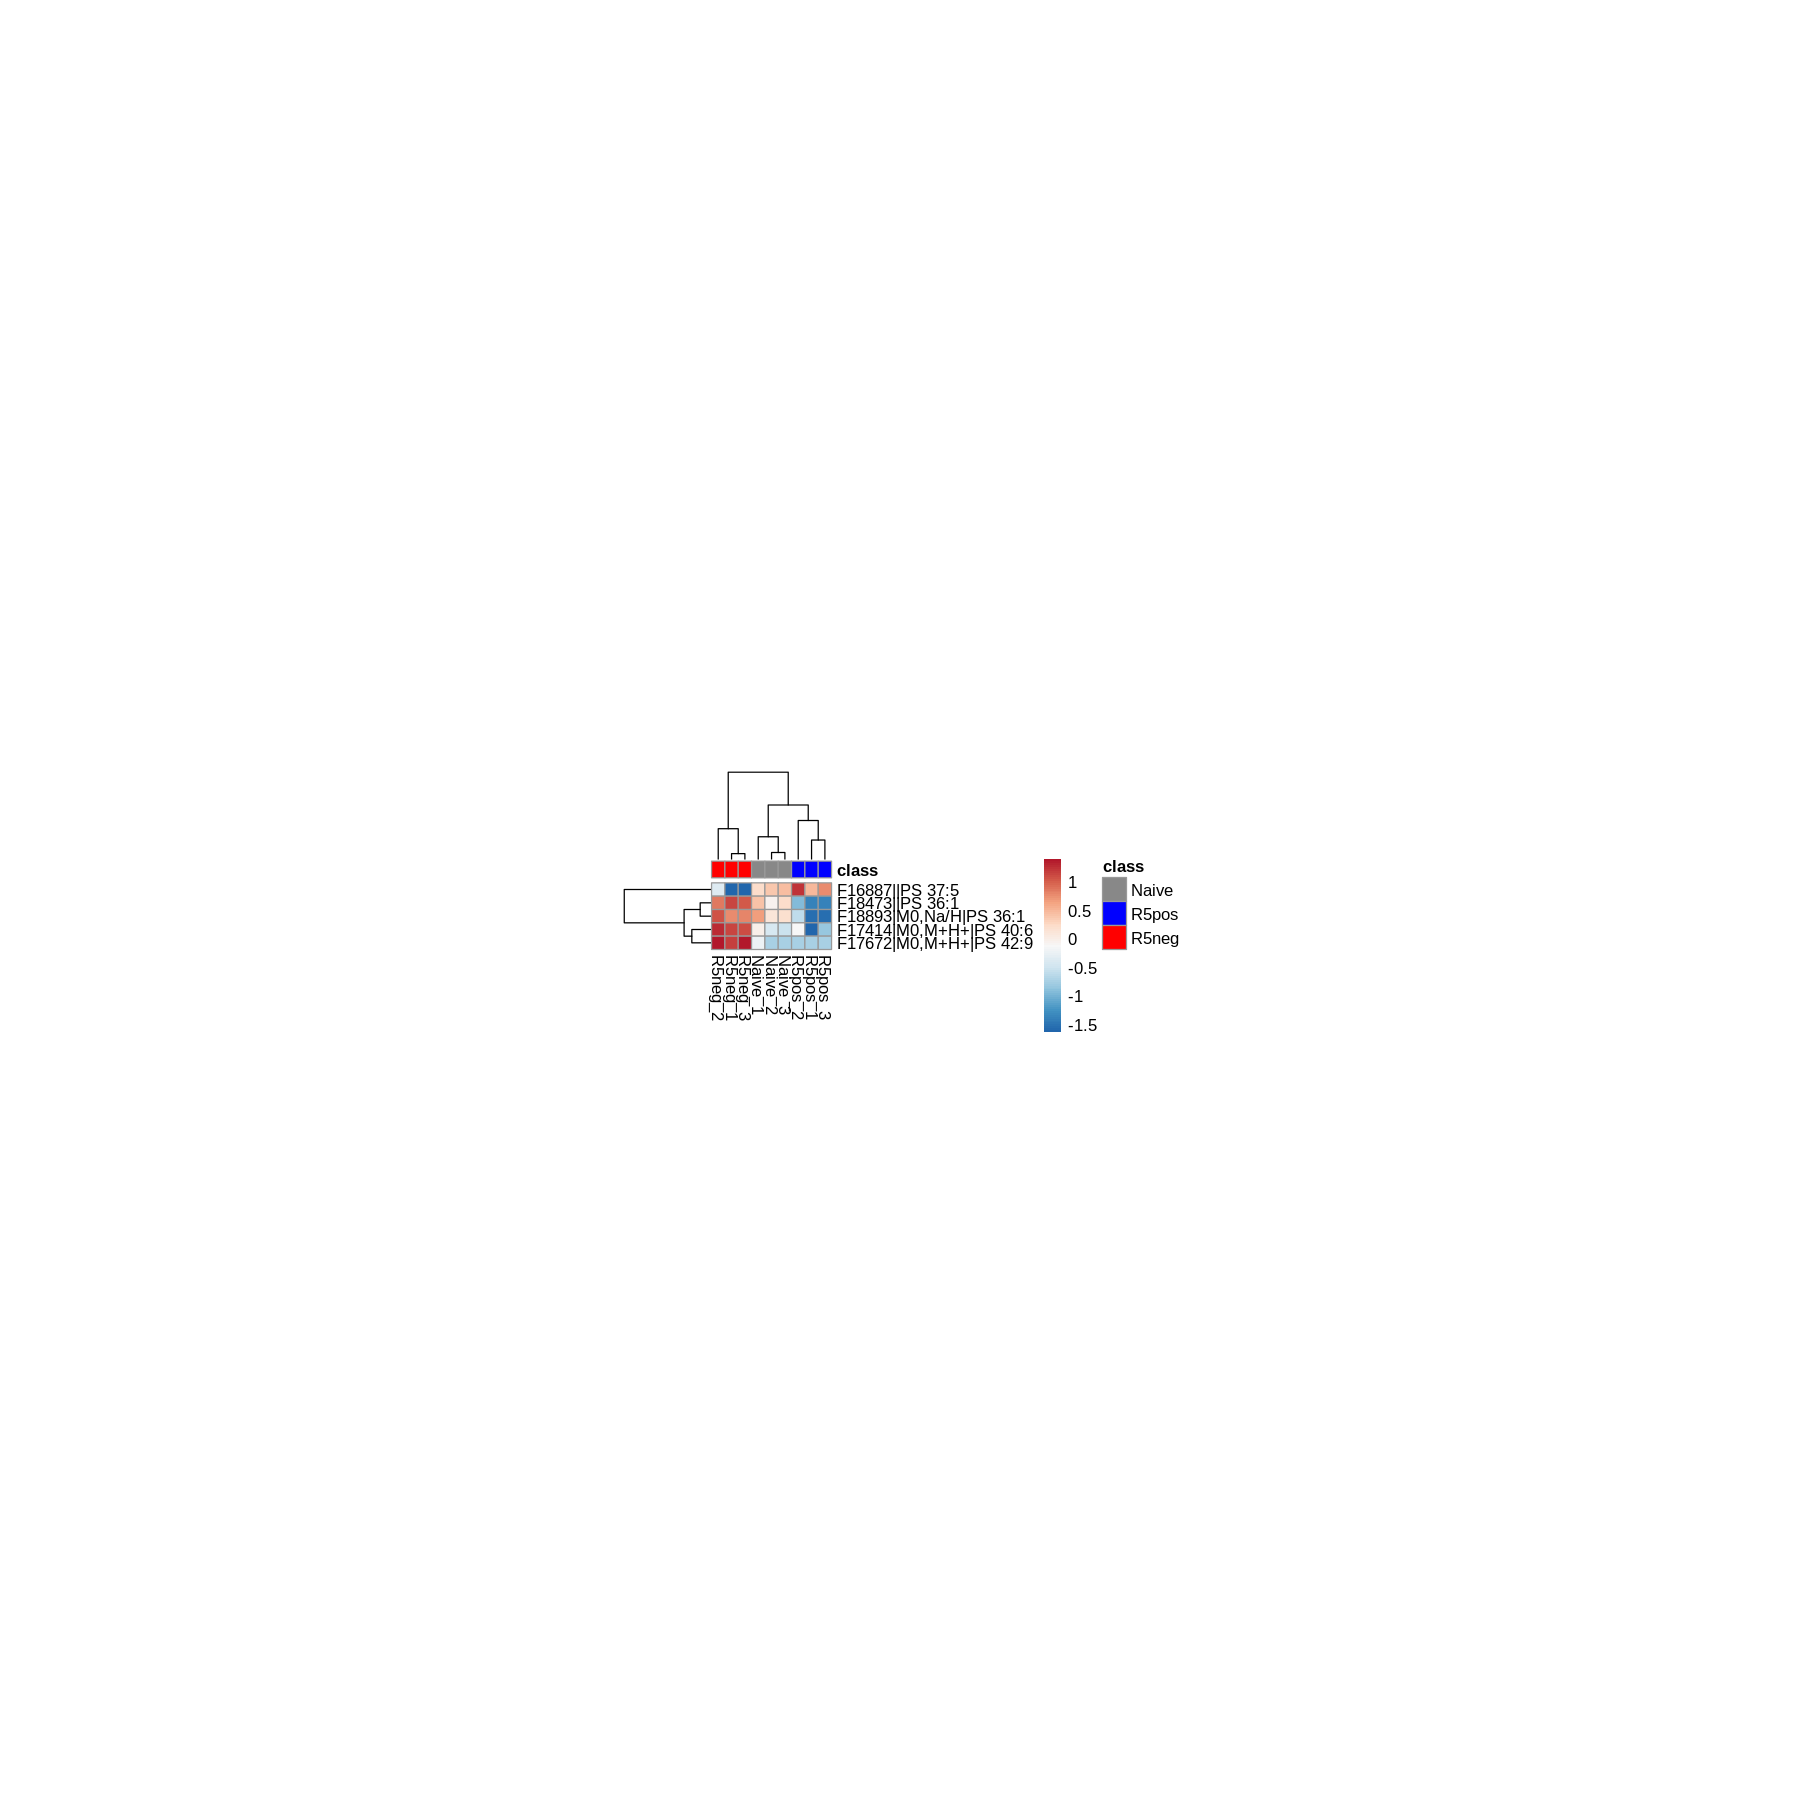

In [134]:
figure_width = 15
figure_height = 15
options(repr.plot.width = figure_width, repr.plot.height = figure_height, res = 300)
library(pheatmap)
p <- pheatmap(feat_df.filt.data.scale,  # data file
         cluster_rows = TRUE, 
         show_rownames = TRUE, 
         cluster_cols = TRUE, 
         annotation_col = annotation_col, 
         clustering_method = "mcquitty",
         cellwidth = 8,
         cellheight = 8,
         color = cell_colors,
         annotation_colors = ann_colors)
ggsave(p, file = out_pdf_file, width = figure_width, height = figure_height, )

-----